In [472]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import os

folder = '../data/processed'
filename = 'dataset_final.csv'
file_path = os.path.join(folder, filename)

try:
    df = pd.read_csv(
        file_path,
        sep=',',
        decimal='.'
    )
    df = df.sort_values(by='DIA', ignore_index=True)
    df = df.drop(columns=['DIA'])
    print(f"✅ DataFrame cargado exitosamente desde: {file_path}")
    print(f"Dimensiones: {df.shape}")
    print("\nPrimeras 5 filas:")
    print(df.head())

except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo en la ruta: {file_path}")
except Exception as e:
    print(f"❌ Error al leer el archivo: {e}")

✅ DataFrame cargado exitosamente desde: ../data/processed\dataset_final.csv
Dimensiones: (1184, 303)

Primeras 5 filas:
   EE Planta / Hl  EE Elaboracion / Hl  EE Bodega / Hl  EE Cocina / Hl  \
0      642.727209            47.145349       69.023256        0.000000   
1        7.767254             0.769609        0.798838        0.319229   
2        8.801205             0.862593        0.835762        0.260924   
3        5.175639             0.439225        0.371077        0.258048   
4        7.924665             0.802365        0.717787        0.301592   

   EE Envasado / Hl  EE Linea 2 / Hl  EE Linea 3 / Hl  EE Linea 4 / Hl  \
0         13.813953        14.578784         0.000000         0.000000   
1          2.358593         4.158962         1.506838         1.521823   
2          1.985462        39.076667         1.448962         1.500923   
3          1.442114         4.348182         1.355238         1.536507   
4          1.664726         5.125920         2.704348         1.4

In [473]:
info_df = pd.DataFrame({
    'columna': df.columns,
    'non_nulls': df.notnull().sum(),
    'dtype': df.dtypes.astype(str)
}).reset_index(drop=True)

pd.set_option('display.max_rows', None)  # muestra todas
print(info_df)


                             columna  non_nulls    dtype
0                     EE Planta / Hl       1157  float64
1                EE Elaboracion / Hl       1157  float64
2                     EE Bodega / Hl       1157  float64
3                     EE Cocina / Hl       1070  float64
4                   EE Envasado / Hl       1157  float64
5                    EE Linea 2 / Hl       1031  float64
6                    EE Linea 3 / Hl        980  float64
7                    EE Linea 4 / Hl       1023  float64
8                  EE Servicios / Hl       1157  float64
9                   EE Sala Maq / Hl       1157  float64
10                      EE Frio / Hl       1157  float64
11                      EE Aire / Hl       1157  float64
12                       EE CO2 / Hl       1157  float64
13                   EE Caldera / Hl       1157  float64
14                      EE Eflu / Hl       1157  float64
15                      EE Agua / Hl       1157  float64
16                EE Resto Serv

In [474]:
def columnas_con_nan(df):
    counts = df.isna().sum()
    cols = counts[counts > 0].index.to_list()

    if cols:
        print("⚠️ Columnas con NaN:", cols)
    else:
        print("✅ No hay columnas con NaN.")

    return cols

# --- Ejemplo de uso ---
cols_con_nan = columnas_con_nan(df)


⚠️ Columnas con NaN: ['EE Planta / Hl', 'EE Elaboracion / Hl', 'EE Bodega / Hl', 'EE Cocina / Hl', 'EE Envasado / Hl', 'EE Linea 2 / Hl', 'EE Linea 3 / Hl', 'EE Linea 4 / Hl', 'EE Servicios / Hl', 'EE Sala Maq / Hl', 'EE Frio / Hl', 'EE Aire / Hl', 'EE CO2 / Hl', 'EE Caldera / Hl', 'EE Eflu / Hl', 'EE Agua / Hl', 'EE Resto Serv / Hl', 'EE Resto Planta / Hl', 'Agua Planta / Hl', 'Agua Elab / Hl', 'Agua Bodega / Hl', 'Agua Cocina / Hl', 'Agua Envas / Hl', 'Agua Linea 2/Hl', 'Agua Linea 3/Hl', 'Agua Linea 4/Hl', 'Agua Servicios/Hl', 'ET Planta / Hl', 'ET Elab/Hl', 'ET Bodega/Hl', 'ET Cocina/Hl', 'ET Envasado/Hl', 'ET Linea 2/Hl', 'ET Linea 3/Hl', 'ET Linea 4/Hl', 'ET Servicios / Hl', 'Aire Planta / Hl', 'Aire Elaboracion / Hl', 'Aire Cocina / Hl', 'Aire Bodega / Hl', 'Aire Envasado / Hl', 'Aire L2 / Hl', 'Aire L3 / Hl', 'Aire L4 / Hl', 'Aire Servicios / Hl', 'CO 2 / Hl', 'CO 2 Filtro / Hl', 'CO 2 linea 3 / Hl', 'CO 2 Linea 4 / Hl', 'Cocimientos Diarios', 'Nivel Silo Bagazo Sur (2)', 'VAPO

Por fortuna, no hay valores nulos presentes en el dataset. Verifiquemos ahora los ceros y los valores negativos.

In [475]:
def columnas_con_negativos(df):

    df_num = df.select_dtypes(include=["number"])

    negativos = (df_num < 0).sum()

    cols_negativas = negativos[negativos > 0].sort_values(ascending=False)
    
    if cols_negativas.empty:
        print("✅ No se encontraron columnas con valores negativos.")
        return pd.DataFrame(columns=["columna", "cantidad_negativos"])
    else:
        print("⚠️ Columnas con valores negativos:")
        return cols_negativas.to_frame(name="cantidad_negativos")
    

def columnas_con_ceros(df):
    df_num = df.select_dtypes(include=["number"])
    counts = (df_num == 0).sum()
    cols = counts[counts > 0].index.to_list()

    if cols:
        print("⚠️ Columnas con ceros:", cols)
    else:
        print("✅ No hay columnas con ceros.")

    return cols

cols_con_neg = columnas_con_negativos(df)
print(cols_con_neg)
cols_con_ceros = columnas_con_ceros(df)
print(cols_con_ceros)


⚠️ Columnas con valores negativos:
                         cantidad_negativos
Resto Serv (Kw)                          41
EE Resto Serv / Hl                       38
Aire Servicios (M3)                      25
Aire Servicios / Hl                      25
Restos Planta (Kw)                       18
EE Resto Planta / Hl                     15
Bodega (Kw)                               7
Temp Tq Intermedio                        6
Linea 2 (Kw)                              6
EE Agua / Hl                              5
EE Bodega / Hl                            5
Prod Agua (Kw)                            5
Agua Servicios/Hl                         3
EE Linea 2 / Hl                           3
Agua Servicios (Hl)                       3
Agua Planta de Agua/Hl                    3
Pta Agua / Eflu (Kw)                      3
Elaboracion (Kw)                          2
ET Linea 3/Hl                             2
Tot Vap Paste L3 / Hora                   2
Retorno Planta CO2                       

Los datos negativos carecen de sentido cuando vemos su comportamiento a lo largo del tiempo, permitiéndonos intuir que se tratan de errores con los sensores. Por esto, optaremos por volver 0 todos los datos negativos.

In [476]:
cols_negativas_array = cols_con_neg.index.to_list()

# Reemplazar los valores negativos por 0 en las columnas identificadas
df[cols_negativas_array] = df[cols_negativas_array].clip(lower=0)

columnas_con_negativos(df)

✅ No se encontraron columnas con valores negativos.


,columna,cantidad_negativos


In [477]:
cols_ceros_array = cols_con_ceros
print("COLUMNAS CON CEROS: ",len(cols_ceros_array))

COLUMNAS CON CEROS:  159


In [478]:
def matriz_correlacion_ceros(df, columnas=None, metodo="spearman", umbral=None):
    """
    Calcula y grafica la correlación entre columnas según la presencia de ceros.
    
    Parámetros:
      - df: DataFrame de entrada.
      - columnas: lista de columnas a incluir (por ejemplo, cols_ceros_array). Si None, usa todas.
      - metodo: método de correlación ('pearson', 'spearman', 'kendall').
      - umbral: si se indica, muestra solo correlaciones |ρ| > umbral.
    """

    # Si se pasan columnas específicas, filtrar el DataFrame
    if columnas is not None:
        columnas_existentes = [c for c in columnas if c in df.columns]
        if not columnas_existentes:
            print("⚠️ Ninguna de las columnas especificadas existe en el DataFrame.")
            return None
        df = df[columnas_existentes]

    # Crear una máscara booleana: 1 si el valor es 0, 0 en caso contrario
    df_zeros = (df == 0).astype(int)
    
    # Calcular la correlación
    corr_zeros = df_zeros.corr(method=metodo)
    
    # Aplicar umbral si se pide
    if umbral is not None:
        corr_filtrada = corr_zeros[(corr_zeros.abs() > umbral) & (corr_zeros.abs() <= 1.0)]
        corr_filtrada = corr_filtrada.dropna(how="all", axis=0).dropna(how="all", axis=1)
    else:
        corr_filtrada = corr_zeros

    # Graficar
    if not corr_filtrada.empty:
        plt.figure(figsize=(16, 10))
        sns.heatmap(
            corr_filtrada,
            annot=True,
            cmap="coolwarm",
            center=0,
            fmt=".2f",
            linewidths=0.5
        )
        titulo = f"Correlación entre columnas según presencia de ceros ({metodo})"
        if columnas is not None:
            titulo += f" — solo columnas seleccionadas ({len(columnas_existentes)})"
        if umbral is not None:
            titulo += f" |ρ| > {umbral}"
        plt.title(titulo, fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No se encontraron correlaciones de ceros que cumplan el umbral.")

    return corr_zeros


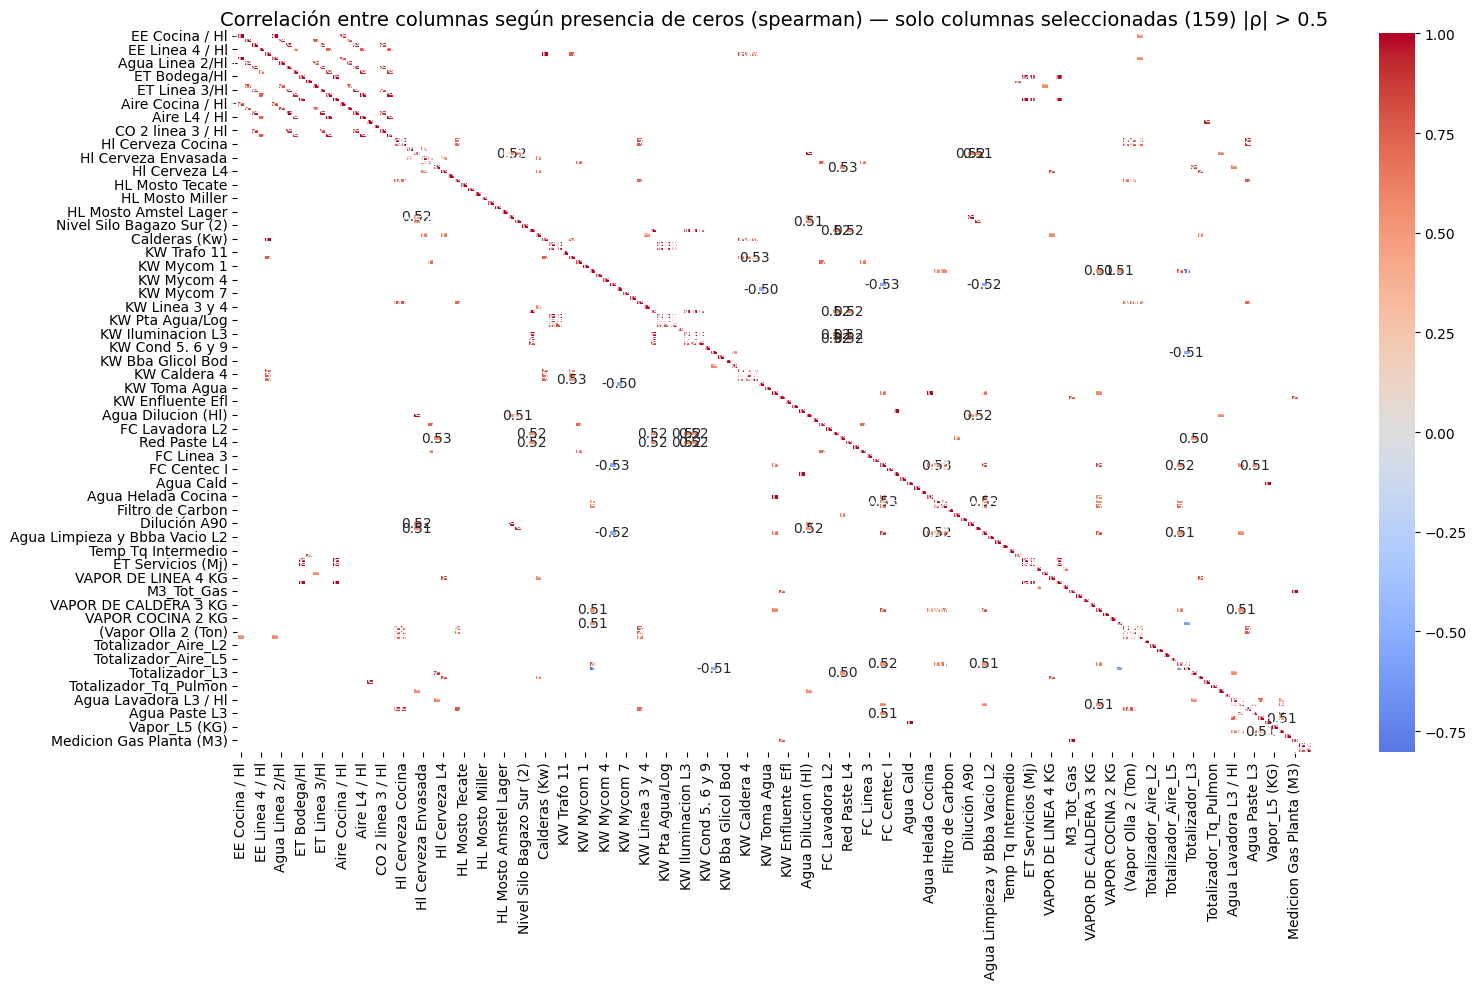

In [479]:
corr_zeros = matriz_correlacion_ceros(df, columnas=cols_ceros_array, metodo="spearman", umbral=0.5)


Antes de comenzar con la imputación, partiremos el dataset en train y test y analizaremos los outliers.

In [480]:
from sklearn.model_selection import train_test_split


test_size = 0.3
split_index = int(len(df) * (1 - test_size))

train_df = df.iloc[:split_index]
test_df  = df.iloc[split_index:]

X_train = train_df.drop(columns=['Frio (Kw) tomorrow'])
y_train = train_df['Frio (Kw) tomorrow']

X_test = test_df.drop(columns=['Frio (Kw) tomorrow'])
y_test = test_df['Frio (Kw) tomorrow']


print("✅ División completada:")
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")


✅ División completada:
X_train: (828, 302)
X_test:  (356, 302)
y_train: (828,)
y_test:  (356,)


In [481]:
# Asegurarse de usar solo columnas numéricas
X_train_num = X_train.select_dtypes(include=[np.number])

# Calcular z-score absoluto
z_scores = np.abs(stats.zscore(X_train_num, nan_policy='omit'))

# Convertir a DataFrame para facilitar análisis
z_scores_df = pd.DataFrame(z_scores, columns=X_train_num.columns, index=X_train_num.index)

umbral = 3.0

# Máscara booleana: True donde hay outliers
outliers_mask = (z_scores_df > umbral)

X_train[outliers_mask] = np.nan

# Cuántos outliers tiene cada columna
outliers_por_col = outliers_mask.sum().sort_values(ascending=False)

print("🔹 Cantidad de outliers por columna:")
print(outliers_por_col[outliers_por_col > 0])


🔹 Cantidad de outliers por columna:
Retorno Planta CO2                 57
KW Atlas 3                         54
HL Mosto Amstel Lager              38
 HL Mosto Golden                   37
HL Mosto IPA                       35
HL Mosto Heineken                  33
Meta Agua Planta de Agua           28
Meta Agua Linea 5                  28
Meta Agua Linea 4                  28
Meta Agua Linea 2                  28
Meta Agua Planta                   28
Meta Agua Envas                    28
Meta Agua Cocina                   28
Meta Agua Bodega                   28
Meta Agua Elab                     28
Meta Agua Servicios                28
Meta Agua Linea 3                  28
VAPOR DE CALDERA 3 KG              25
Kw Casona                          25
Agua Red Servicios                 25
Temp Tq Intermedio                 23
Efluentes (Kw)                     23
Aire L2 / Hl                       23
CO 2 Linea 4 / Hl                  23
CO 2 linea 3 / Hl                  23
HL Mosto Sol  

Ahora sí, a imputar.

In [482]:
# 1️⃣ Columnas con ceros (que querés imputar)
columnas_con_nan(X_train)
cols_con_ceros = columnas_con_ceros(X_train)
cols_con_nan = columnas_con_nan(X_train)
cols = list(set(cols_con_ceros + cols_con_nan))

# --- Train: reemplazo ceros -> NaN
X_train_temp = X_train.copy()
X_train_temp[cols] = X_train_temp[cols].replace(0, np.nan)

# --- 1) Columnas con TODO 😤😤🗣️ NaN ---
cols_todo_nan = X_train_temp.columns[X_train_temp.isna().all()]
print("❌ Eliminando columnas con todo NaN:", list(cols_todo_nan))
X_train_temp = X_train_temp.drop(columns=cols_todo_nan)

# --- 2) Columnas con varianza cero ---
cols_var_cero = X_train_temp.columns[X_train_temp.nunique() <= 1]
print("❌ Eliminando columnas con varianza cero:", list(cols_var_cero))
X_train_temp = X_train_temp.drop(columns=cols_var_cero)

# 🔥 **ACTUALIZAR lista de columnas a imputar**
cols = [c for c in cols if c in X_train_temp.columns]

# --- Interpolación train ---
X_train = X_train_temp.copy()
X_train[cols] = (
    X_train_temp[cols]
        .interpolate(method='linear', limit_direction='forward')
        .ffill()
)

# --- Test ---
X_test_temp = X_test.copy()
X_test_temp[cols] = X_test_temp[cols].replace(0, np.nan)

# Último valor válido del train
last_train_row = X_train[cols].ffill().iloc[[-1]]

# Interpolación test heredando el último valor del train
prep = pd.concat([last_train_row, X_test_temp[cols]], ignore_index=True)
prep_imputado = prep.interpolate(method='linear', limit_direction='forward').ffill()
prep_imputado = prep_imputado.iloc[1:].reset_index(drop=True)

# Asignar a X_test
X_test = X_test.copy()
X_test.loc[:, cols] = prep_imputado.values
columnas_con_nan(X_train)


⚠️ Columnas con NaN: ['EE Planta / Hl', 'EE Elaboracion / Hl', 'EE Bodega / Hl', 'EE Cocina / Hl', 'EE Envasado / Hl', 'EE Linea 2 / Hl', 'EE Linea 3 / Hl', 'EE Linea 4 / Hl', 'EE Servicios / Hl', 'EE Sala Maq / Hl', 'EE Frio / Hl', 'EE Aire / Hl', 'EE CO2 / Hl', 'EE Caldera / Hl', 'EE Eflu / Hl', 'EE Agua / Hl', 'EE Resto Serv / Hl', 'EE Resto Planta / Hl', 'Agua Planta / Hl', 'Agua Elab / Hl', 'Agua Bodega / Hl', 'Agua Cocina / Hl', 'Agua Envas / Hl', 'Agua Linea 2/Hl', 'Agua Linea 3/Hl', 'Agua Linea 4/Hl', 'Agua Servicios/Hl', 'Agua Planta de Agua/Hl', 'Produccion Agua / Hl', 'ET Planta / Hl', 'ET Elab/Hl', 'ET Bodega/Hl', 'ET Cocina/Hl', 'ET Envasado/Hl', 'ET Linea 2/Hl', 'ET Linea 3/Hl', 'ET Linea 4/Hl', 'ET Servicios / Hl', 'Aire Planta / Hl', 'Aire Elaboracion / Hl', 'Aire Cocina / Hl', 'Aire Bodega / Hl', 'Aire Envasado / Hl', 'Aire L2 / Hl', 'Aire L3 / Hl', 'Aire L4 / Hl', 'Aire Servicios / Hl', 'CO 2 / Hl', 'CO 2 Filtro / Hl', 'CO 2 linea 3 / Hl', 'CO 2 Linea 4 / Hl', 'Hl Cer

['EE Planta / Hl',
 'EE Elaboracion / Hl',
 'EE Bodega / Hl',
 'EE Cocina / Hl',
 'EE Linea 3 / Hl',
 'EE Linea 4 / Hl',
 'EE Servicios / Hl',
 'EE Sala Maq / Hl',
 'EE Frio / Hl',
 'EE Aire / Hl',
 'EE CO2 / Hl',
 'EE Eflu / Hl',
 'EE Agua / Hl',
 'EE Resto Serv / Hl',
 'Agua Planta / Hl',
 'Agua Elab / Hl',
 'Agua Bodega / Hl',
 'Agua Cocina / Hl',
 'Agua Envas / Hl',
 'Agua Linea 3/Hl',
 'Agua Linea 4/Hl',
 'Agua Servicios/Hl',
 'Agua Planta de Agua/Hl',
 'Produccion Agua / Hl',
 'ET Planta / Hl',
 'ET Elab/Hl',
 'ET Bodega/Hl',
 'ET Cocina/Hl',
 'ET Envasado/Hl',
 'ET Linea 3/Hl',
 'ET Linea 4/Hl',
 'ET Servicios / Hl',
 'Aire Planta / Hl',
 'Aire Elaboracion / Hl',
 'Aire Cocina / Hl',
 'Aire Bodega / Hl',
 'Aire Envasado / Hl',
 'Aire L3 / Hl',
 'Aire L4 / Hl',
 'Aire Servicios / Hl',
 'CO 2 / Hl',
 'CO 2 Filtro / Hl',
 'CO 2 linea 3 / Hl',
 'CO 2 Linea 4 / Hl',
 'Hl de Mosto',
 'Hl Cerveza Cocina',
 'Hl Cerveza Filtrada',
 'Hl Cerveza L3',
 'Hl Cerveza L5',
 'Cocimientos Diarios

FEATURE ENGINEERING

In [483]:
df["Frio (Kw)_movil_5"] = df["Frio (Kw)"].rolling(window=5, min_periods=1).mean()
df["finde"] = df["Dia_semana"].isin(["Sabado", "Domingo"]).astype(int)
print(df.shape)

(1184, 305)


In [484]:
def agregar_ratios(df):
    """
    Agrega columnas de ratios energéticos entre áreas principales.
    Requiere que las columnas base estén en el DataFrame.
    """

    df = df.copy()

    # --- Ratios respecto a Planta ---
    df["ratio_SalaMaq_Planta"] = df["Sala Maq (Kw)"] / df["Planta (Kw)"]
    df["ratio_Servicios_Planta"] = df["Servicios (Kw)"] / df["Planta (Kw)"]
    df["ratio_Produccion_Planta"] = df["Produccion (Hl)"] / df["Planta (Kw)"]

    # --- Ratios respecto a Producción ---
    df["ratio_SalaMaq_Produccion"] = df["Sala Maq (Kw)"] / df["Produccion (Hl)"]
    df["ratio_Servicios_Produccion"] = df["Servicios (Kw)"] / df["Produccion (Hl)"]
    df["ratio_Planta_Produccion"] = df["Planta (Kw)"] / df["Produccion (Hl)"]
    df["ratio_Cocina_Produccion"] = df["Cocina (Kw)"] / df["Produccion (Hl)"]

    # --- Ratios específicos adicionales ---
    df["ratio_Cocina_SalaMaq"] = df["Cocina (Kw)"] / df["Sala Maq (Kw)"]
    df["ratio_Cocina_Servicios"] = df["Cocina (Kw)"] / df["Servicios (Kw)"]
    df["ratio_Servicios_SalaMaq"] = df["Servicios (Kw)"] / df["Sala Maq (Kw)"]

    # Evitar infinitos o NaN si alguna división tiene 0
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    return df


# 🧪 Ejemplo de uso:
#df = agregar_ratios(df)


Nos quedaremos con las 15 variables más correlacionadas con la target y haremos un PolynomialFeatures sobre ellas.

In [485]:
target = "Frio (Kw) tomorrow" 

# --- 1️⃣ Calcular correlaciones ---
corr_spearman = df.corr(method="spearman", numeric_only=True)
corr_target = corr_spearman[target].drop(target).sort_values(ascending=False)

# 🔹 Seleccionar las 15 más correlacionadas (en valor absoluto)
top15 = corr_target.abs().sort_values(ascending=False).head(15)
top15 = corr_target.loc[top15.index]  # mantener signo original

print("🔝 Top 15 variables más correlacionadas con el target:")
print(top15)

🔝 Top 15 variables más correlacionadas con el target:
Frio (Kw)              0.846920
Frio (Kw)_movil_5      0.840439
Sala Maq (Kw)          0.825471
Servicios (Kw)         0.822891
KW Gral Planta         0.787441
Planta (Kw)            0.782961
Agua Planta (Hl)       0.721385
Tarifa_electrica       0.714636
Planta de agua (Hl)    0.712076
ET Bodega/Hl          -0.699315
KW Cond 5. 6 y 9       0.688916
ET Servicios / Hl     -0.684934
Meta ET Linea 3       -0.684465
Meta ET Servicios     -0.684465
Meta ET Elab          -0.684465
Name: Frio (Kw) tomorrow, dtype: float64


In [486]:
from sklearn.preprocessing import PolynomialFeatures

def generar_features_polinomicos(df, columnas_numericas, grado=2, incluir_bias=False):
    """
    Genera características polinómicas a partir de las columnas numéricas del DataFrame.

    Parámetros:
        df: DataFrame original.
        columnas_numericas: lista de columnas sobre las cuales generar los polinomios.
        grado: grado del polinomio (por defecto 2).
        incluir_bias: si True, incluye una columna de 1s.

    Retorna:
        DataFrame con las nuevas columnas polinómicas y las originales .
    """

    # Seleccionamos las columnas numéricas elegidas
    df_num = df[columnas_numericas]

    # Generamos las features polinómicas
    poly = PolynomialFeatures(degree=grado, include_bias=incluir_bias)
    arr_poly = poly.fit_transform(df_num)

    # Nombres de las nuevas columnas
    nombres_poly = poly.get_feature_names_out(columnas_numericas)

    # DataFrame con las columnas polinómicas
    df_poly = pd.DataFrame(arr_poly, columns=nombres_poly, index=df.index)

    # Si queremos mantener las originales, concatenamos
    # Evitamos duplicar columnas que ya existían (como las de grado 1)
    nuevas_columnas = [c for c in df_poly.columns if c not in df.columns]
    df_resultado = pd.concat([df, df_poly[nuevas_columnas]], axis=1)
    return df_resultado


# 🧪 Ejemplo de uso:
#df = generar_features_polinomicos(df, top15.index.tolist(), grado=2)
#print(df.shape)



Todas estas columnas que añadimos nos trajeron problemáticas de outliers y nans que debemos solucionar. Por ello, repetiremos lo utilizado previamente.

In [487]:
# --- 0) Reemplazar ceros por NaN solo en las columnas imputables ---
X_train[cols] = X_train[cols].replace(0, np.nan)
X_test[cols]  = X_test[cols].replace(0, np.nan)

# --- 1) Columnas con TODO NaN ---
cols_todo_nan = X_train.columns[X_train.isna().all()]
print("❌ Eliminando columnas con todo NaN:", list(cols_todo_nan))

X_train = X_train.drop(columns=cols_todo_nan)
X_test  = X_test.drop(columns=cols_todo_nan, errors='ignore')

# --- 2) Columnas con varianza cero ---
cols_var_cero = X_train.columns[X_train.nunique() <= 1]
print("❌ Eliminando columnas con varianza cero:", list(cols_var_cero))

X_train = X_train.drop(columns=cols_var_cero)
X_test  = X_test.drop(columns=cols_var_cero, errors='ignore')

# 🔥 3) Filtrar columnas imputables que realmente siguen existiendo ---
cols = [c for c in cols if c in X_train.columns]
print("✔️ Columnas a imputar tras filtrado:", cols)

columnas_con_nan(X_train)


❌ Eliminando columnas con todo NaN: []
❌ Eliminando columnas con varianza cero: []
✔️ Columnas a imputar tras filtrado: ['Agua Planta / Hl', 'ET Linea 4/Hl', 'Aire L2 / Hl', 'KW Iluminacion L3', 'KW Enfluente Efl', 'Meta Aire L4', 'Meta Aire Planta', 'Tot Vap Lav L3 / Hora', 'VAPOR DE LINEA 4 KG', 'KW Mycom 7', 'KW Linea 3 y 4', 'EE CO2 / Hl', 'KW Filtr Carbon', 'Red Paste L3', 'HL Mosto Tecate', 'Planta (Kw)', 'Agua Servicios/Hl', 'ET Servicios (Mj)', 'Totalizador_Tq_Pulmon', 'Agua Cald', 'Linea 3 (Kw)', 'Red  Bodega Interno', 'Kw Admininistracion', 'Hl Cerveza L2', 'Hl Cerveza Filtrada', 'KW Iluminacion L4', 'KW Trafo 12', 'KW Cond 5. 6 y 9', 'FC Linea 3', 'VAPOR DE CALDERA 3 KG', 'Totalizador_Filtracion', 'Kw Casona', 'KW Trafo 4', 'Meta ET Linea 4', 'Meta Aire Bodega', 'Meta Aire Elaboracion', 'KW Secador Kaeser', 'Agua CO2', 'Meta Agua Envas', 'Bodega (Kw)', 'EE Elaboracion / Hl', 'ET Elab/Hl', 'Filtro de Carbon', 'Agua Cist Industrial', 'Hl de Mosto Copia', 'VAPOR DE CALDERA 4 KG

['EE Planta / Hl',
 'EE Elaboracion / Hl',
 'EE Bodega / Hl',
 'EE Cocina / Hl',
 'EE Linea 3 / Hl',
 'EE Linea 4 / Hl',
 'EE Servicios / Hl',
 'EE Sala Maq / Hl',
 'EE Frio / Hl',
 'EE Aire / Hl',
 'EE CO2 / Hl',
 'EE Eflu / Hl',
 'EE Agua / Hl',
 'EE Resto Serv / Hl',
 'Agua Planta / Hl',
 'Agua Elab / Hl',
 'Agua Bodega / Hl',
 'Agua Cocina / Hl',
 'Agua Envas / Hl',
 'Agua Linea 3/Hl',
 'Agua Linea 4/Hl',
 'Agua Servicios/Hl',
 'Agua Planta de Agua/Hl',
 'Produccion Agua / Hl',
 'ET Planta / Hl',
 'ET Elab/Hl',
 'ET Bodega/Hl',
 'ET Cocina/Hl',
 'ET Envasado/Hl',
 'ET Linea 3/Hl',
 'ET Linea 4/Hl',
 'ET Servicios / Hl',
 'Aire Planta / Hl',
 'Aire Elaboracion / Hl',
 'Aire Cocina / Hl',
 'Aire Bodega / Hl',
 'Aire Envasado / Hl',
 'Aire L3 / Hl',
 'Aire L4 / Hl',
 'Aire Servicios / Hl',
 'CO 2 / Hl',
 'CO 2 Filtro / Hl',
 'CO 2 linea 3 / Hl',
 'CO 2 Linea 4 / Hl',
 'Hl de Mosto',
 'Hl Cerveza Cocina',
 'Hl Cerveza Filtrada',
 'Hl Cerveza L3',
 'Hl Cerveza L5',
 'Cocimientos Diarios

In [488]:
resultado = columnas_con_nan(X_train)
print(len(cols), len(resultado))

cols_con_ceros = columnas_con_ceros(X_train)
cols_con_nan = columnas_con_nan(X_train)
cols = list(set(cols_con_ceros + cols_con_nan))

X_train[cols] = (
    X_train[cols]
        .interpolate(method='linear', limit_direction='both')
        .ffill()
        .bfill()
)

cols_con_ceros = columnas_con_ceros(X_train)
cols_con_nan = columnas_con_nan(X_train)
cols = list(set(cols_con_ceros + cols_con_nan))

resultado = columnas_con_nan(X_train)
print(len(cols), len(resultado))


⚠️ Columnas con NaN: ['EE Planta / Hl', 'EE Elaboracion / Hl', 'EE Bodega / Hl', 'EE Cocina / Hl', 'EE Linea 3 / Hl', 'EE Linea 4 / Hl', 'EE Servicios / Hl', 'EE Sala Maq / Hl', 'EE Frio / Hl', 'EE Aire / Hl', 'EE CO2 / Hl', 'EE Eflu / Hl', 'EE Agua / Hl', 'EE Resto Serv / Hl', 'Agua Planta / Hl', 'Agua Elab / Hl', 'Agua Bodega / Hl', 'Agua Cocina / Hl', 'Agua Envas / Hl', 'Agua Linea 3/Hl', 'Agua Linea 4/Hl', 'Agua Servicios/Hl', 'Agua Planta de Agua/Hl', 'Produccion Agua / Hl', 'ET Planta / Hl', 'ET Elab/Hl', 'ET Bodega/Hl', 'ET Cocina/Hl', 'ET Envasado/Hl', 'ET Linea 3/Hl', 'ET Linea 4/Hl', 'ET Servicios / Hl', 'Aire Planta / Hl', 'Aire Elaboracion / Hl', 'Aire Cocina / Hl', 'Aire Bodega / Hl', 'Aire Envasado / Hl', 'Aire L3 / Hl', 'Aire L4 / Hl', 'Aire Servicios / Hl', 'CO 2 / Hl', 'CO 2 Filtro / Hl', 'CO 2 linea 3 / Hl', 'CO 2 Linea 4 / Hl', 'Hl de Mosto', 'Hl Cerveza Cocina', 'Hl Cerveza Filtrada', 'Hl Cerveza L3', 'Hl Cerveza L5', 'Cocimientos Diarios', 'HL Mosto Tecate', 'HL Mo

In [489]:
# Obtener última fila válida del train para estas columnas
last_train_row = X_train[cols].ffill().iloc[[-1]]

# Concatenar semilla + test para interpolar usando datos previos
prep = pd.concat([last_train_row, X_test[cols]], ignore_index=True)

prep_imputado = (
    prep.interpolate(method='linear', limit_direction='forward')
        .ffill()
)

# Quitar la fila semilla
prep_imputado = prep_imputado.iloc[1:].reset_index(drop=True)

# Asignar de vuelta a X_test
X_test[cols] = prep_imputado


Usamos .get_dummies para aplicar One-Hot a las variables categóricas

In [490]:
def aplicar_get_dummies(X_train, X_test):
    
    # One-hot SOLO sobre el TRAIN
    X_train_dum = pd.get_dummies(X_train, drop_first=True)
    
    # One-hot sobre TEST, pero puede tener columnas diferentes
    X_test_dum = pd.get_dummies(X_test, drop_first=True)
    
    # Re-alinear TEST a las columnas del TRAIN
    X_test_dum = X_test_dum.reindex(columns=X_train_dum.columns, fill_value=0)

    return X_train_dum, X_test_dum


X_train, X_test = aplicar_get_dummies(X_train, X_test)


print(X_train.shape, X_test.shape)


(828, 307) (356, 307)


Como nos quedaron múltiples columnas, veamos con LASSO y Feature Importances qué podemos sacarnos de encima.

In [491]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

def importancia_variables_rf(X_train, y_train, n_estimators=300, max_depth=None, random_state=42):
    """
    Entrena un Random Forest y devuelve un DataFrame con la importancia de variables.
    """
    # ⚖️ Escalado no es obligatorio para RF, pero puede ayudar si las magnitudes son muy distintas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)

    # 🌲 Entrenamos el modelo
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state,
        n_jobs=-1
    )
    rf.fit(X_scaled, y_train)

    # 📊 Importancia de las variables
    importancias = pd.DataFrame({
        'variable': X_train.columns,
        'importancia': rf.feature_importances_
    }).sort_values(by='importancia', ascending=False)

    # 🧩 Mostramos el top 15
    print("\nTop 15 variables más importantes:")
    display(importancias.head(15))

    return rf, importancias


In [492]:
#modelo_rf, importancia_df = importancia_variables_rf(X_train_dum, y_train)

In [493]:
def graficar_importancia(importancias, top_n=15):
    top = importancias.head(top_n).sort_values(by='importancia')
    plt.figure(figsize=(8, 6))
    plt.barh(top['variable'], top['importancia'])
    plt.title(f'Top {top_n} variables más importantes (Random Forest)')
    plt.xlabel('Importancia')
    plt.tight_layout()
    plt.show()

# 🪄 Ejemplo:
#graficar_importancia(importancia_df, top_n=50)


In [494]:
#top_50_vars = importancia_df.head(50)['variable'].tolist()

#X_train_top50 = X_train_dum[top_50_vars].copy()

#print(f"✅ Quedaste con {X_train_top50.shape[1]} variables importantes.")
#X_train_top50.head()


In [495]:
from sklearn.linear_model import Lasso

# Supongamos que tu target es y_train
# Escalamos los datos porque Lasso es sensible a la escala
scaler = StandardScaler()


X_scaled_df = pd.DataFrame(X_train, columns=X_train.columns)
cols_con_nan = X_scaled_df.columns[X_scaled_df.isna().any()]
print("Columnas con NaNs antes del escalado:", list(cols_con_nan))


X_scaled = scaler.fit_transform(X_train)


# Identificar dónde aparecen NaNs tras escalar
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)
cols_con_nan = X_scaled_df.columns[X_scaled_df.isna().any()]
print("Columnas con NaNs luego del escalado:", list(cols_con_nan))


# Definimos el modelo Lasso
# Ajusta alpha según la regularización que quieras
lasso = Lasso(alpha=0.01, random_state=42)

lasso.fit(X_scaled, y_train)

# Obtenemos coeficientes
coef = pd.Series(lasso.coef_, index=X_train.columns)

# Mostramos importancia absoluta ordenada
importancia = coef.abs().sort_values(ascending=False)
print(importancia)

# Opcional: filtrar solo variables con coef != 0
variables_relevantes = coef[coef != 0].sort_values(key=abs, ascending=False)
print(variables_relevantes)


Columnas con NaNs antes del escalado: []
Columnas con NaNs luego del escalado: []
KW Trafo 11                        1.592959e+05
Planta (Kw)                        1.206358e+05
Aire Envasado (M3)                 1.000627e+05
Linea 3 (Kw)                       9.501344e+04
EE CO2 / Hl                        9.384176e+04
EE Servicios / Hl                  8.602608e+04
ET Envasado (Mj)                   8.351837e+04
Frio (Kw)                          7.953788e+04
EE Planta / Hl                     7.621979e+04
KW Linea 3                         7.335554e+04
Agua Servicios/Hl                  6.548481e+04
Cocina (Kw)                        6.400184e+04
KW Mycom 1                         6.396118e+04
Agua Planta / Hl                   5.901654e+04
KW Trafo 5                         5.800225e+04
ET Planta / Hl                     5.778785e+04
Aire Planta (M3)                   5.636584e+04
Aire Elaboracion (m3)              5.113307e+04
M3_Tot_Gas                         5.089681e+04
KW Cal

c:\Users\franc\Desktop\MostoElMostro\MostoElMostro\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.834e+12, tolerance: 7.768e+08
  model = cd_fast.enet_coordinate_descent(


c:\Users\franc\Desktop\MostoElMostro\MostoElMostro\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.834e+12, tolerance: 7.768e+08
  model = cd_fast.enet_coordinate_descent(


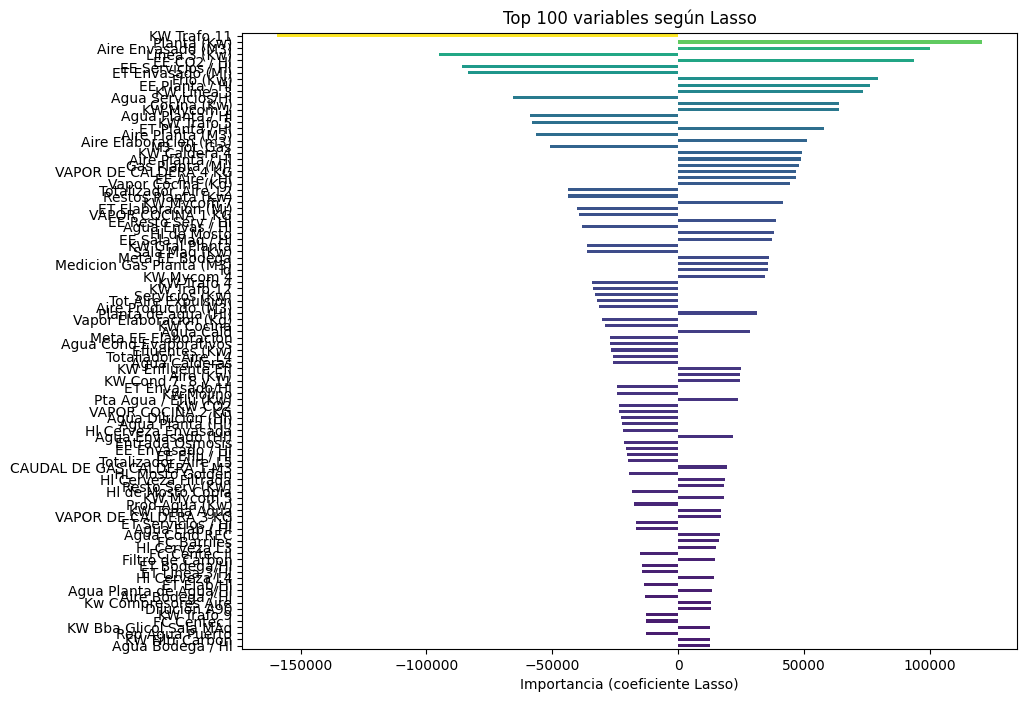

In [496]:
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Convertimos a DataFrame para poder indexar con nombres
X_train = pd.DataFrame(X_scaled, columns=X_train.columns, index=X_train.index)

# Ajustamos Lasso
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)

# Coeficientes como Series
coef = pd.Series(lasso.coef_, index=X_train.columns)

# Top 100 absolutos
top100 = coef.abs().sort_values(ascending=False).head(100)

# Recuperar con signo
top100_signed = coef[top100.index].sort_values(key=abs, ascending=True)

# Gráfico
plt.figure(figsize=(10,8))
top100_signed.plot(kind='barh', color=plt.cm.viridis(np.abs(top100_signed) / np.abs(top100_signed).max()))
plt.xlabel('Importancia (coeficiente Lasso)')
plt.title('Top 100 variables según Lasso')
plt.show()


In [497]:
# Filtrar dataframe escalado
top100_vars = top100_signed.index.tolist()
X_train_top100 = X_train[top100_vars].copy()

print(f"✅ Quedaste con {X_train_top100.shape[1]} variables importantes")
print(X_train_top100.shape)

✅ Quedaste con 100 variables importantes
(828, 100)


Aparenta tener bastante sentido quedarnos con este conjunto de variables para trabajar. No dejan de ser productos entre el promedio móvil de la variable de Frío y las features con mayor correlación a la misma.